# Soscipy
Soscipy is a python library to simplify working with data specially in social sciences. While there are several packages out there, I have personally found it difficult to find out the right library to stick to and the right recepies to use. Unlike other domain where computational methods have seen a rapid growth, social sciences remain a relatively unexplored area. This is first of the 4 tutorials which will explore data analysis in education. 

There are four parts to soscipy:
- **Data Analysis** : Aims to make rapid analysis easy while not compromising on any functionalities and extendability
- **Data Processing** : Makes common actions with structured data easy and accessible without needing expertiese in computer science
- **Data Visualisation** : Rapid visualisations while ensuring that the output is publication quality
- **Utilities** : A set of utilities that you can plug and play to make your workflow easy

### Data Analysis

There are four types of structured datasets that is majorly dealt with in social science:
- Time series
- Microdata
- Geospatial

In this notebook we will see an example of all of these four data types, how to do basic EDA using soscipy and how to do quick visualisations

### 1. Problem statement
We want to analyse the relationship between the countries expenditure on education and their income inequality. We will import data from worldbank using soscipy dataloader. We will enrich the data with some of the common economic indicators and then we will do a regression analysis and plot it to see the relationship between these two indicators.

**Fetching data**
- We will visit the World Bank data page and look for the datafile. Use this URL: https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?view=chart

In [1]:
!pip install --upgrade soscipy

Requirement already up-to-date: soscipy in /Users/saurabhkarn/opt/anaconda3/lib/python3.8/site-packages (0.0.17)


In [5]:
import pandas as pd
from soscipy.process import dfops

In [6]:
f1 = '/Users/saurabhkarn/PycharmProjects/kornect/test_data/rangin_justicehub-file.xlsx'
f2 = '/Users/saurabhkarn/PycharmProjects/kornect/test_data/gyan_data.csv'

In [7]:
df1 = pd.read_excel(f1)
df2 = pd.read_csv(f2)

In [10]:
temp = dfops.combine(df1,df2)

In [12]:
temp.to_csv('test.csv')

In [ ]:
temp.to_csv("test.csv")

In [ ]:
def get_indicator(url):
    indicator = url.split('?')[0].split('/')[-1]
    return indicator
def world_bank_data(url, date, mrv=2):
    """
    Takes a URL for input and extracts the indicator string. This is then used to extract data from world bank data
    :param url: URL of the data page
    :return: Dataframew with indicator as the last column
    """
    indicator = get_indicator(url)
    data = wb.get_series(indicator, date=date,mrv=mrv).to_frame().reset_index()
    series = data['Series'].unique()[0]
    data = data.drop(['Series'], axis=1)
    data.Year = data.Year.apply(lambda x: int(x))
    data = dfops.rename_pd(data, [data.columns[-1]], [series])
    return data

https://wbdata.readthedocs.io/en/stable/#:~:text=Wbdata%20is%20a%20simple%20python,for%20searching%20and%20retrieving%20information.

In [ ]:
data = world_bank_data(data_url,date='2018:2020')
data

In [ ]:
for Y in data.Year.unique():
    data[str(Y)] = data[data.Year == Y][data.columns[-1]]

In [ ]:
data[str(Y)] = data[data.Year == Y][data.columns[-1]]

In [ ]:
data

<AxesSubplot:xlabel='year', ylabel='month'>

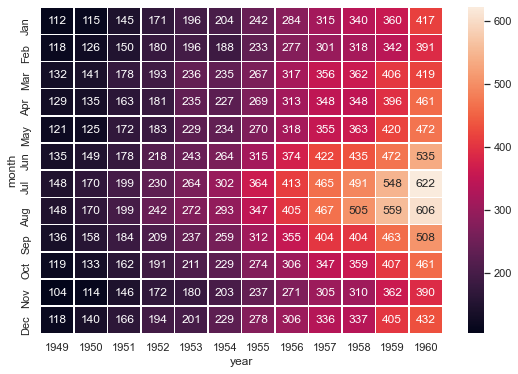

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [21]:
a = [1,2,3]

In [25]:
a.remove(3)

In [26]:
a

[1, 2]

In [46]:
def heatmap(df,independent_variable,swap_axis=False):
    cols = list(df.columns)
    cols.remove(independent_variable)
    if swap_axis:
        temp = df.pivot(cols[0],cols[1],independent_variable)
    else:
        temp = df.pivot(cols[1],cols[0],independent_variable)
    return sns.heatmap(temp, annot=True, fmt="d", linewidths=.5)

<AxesSubplot:xlabel='year', ylabel='month'>

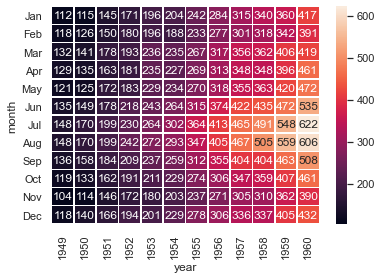

In [47]:
heatmap(flights_long,'passengers')

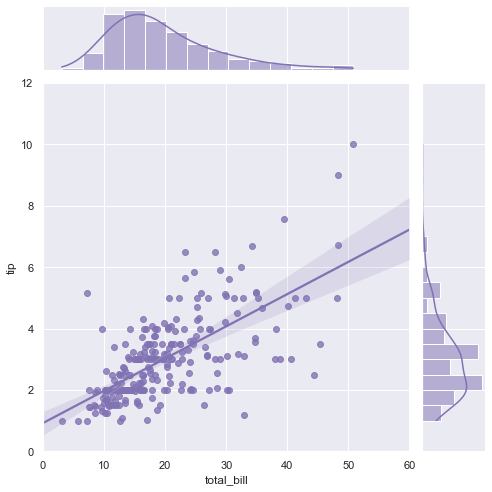

In [15]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

### Installation 

In [ ]:
!pip install --upgrade soscipy